In [107]:
import random
import matplotlib.pyplot as plt

In [108]:
"""
Generalizing the Monty Hall Problem to n doors with 1 car behind them
Assumptions for some open-ended questions:
1) There is only one door with a car behind it
""" 
def simulate_one_game(num_doors, mode=0):
    # simulate the doors with car and goats (0 for goat and 1 for car)
    doors = [0 for each in range(num_doors)]
    door_w_car = random.randrange(num_doors)
    doors[door_w_car] = 1 # Note: only the door with a car behind it will be marked as 1
    is_win = False
    # Let contestent choose the door
    choice_cont =  random.randrange(num_doors)
    
    if mode==0:
        # the contestent sticks to the choice
        if doors[choice_cont]==1:
            is_win = True
    else:
        # the contestent changes the choice
        # Let host select one of the doors with a goat
        choice_host = random.choice([index for index in range(num_doors) if index!=choice_cont and doors[index]==0])
        
        # 2nd choice of contestent
        choice_cont2 = random.choice([index for index in range(num_doors) if index not in [choice_cont, choice_host]])
        if doors[choice_cont2]==1:
            is_win = True
            
    return is_win

In [109]:
def simulate(num_doors, iterations, mode=0):
    num_wins = 0
    for i in range(iterations):
        if simulate_one_game(num_doors,mode)==True:
            num_wins+=1
    return num_wins/iterations

# Simulating for 3 doors
print("Probability of winning if we stick to the choice", simulate(3, 10000,0))
print("Probability of winning if we swap the choice", simulate(3, 10000,1))

Probability of winning if we stick to the choice 0.3285
Probability of winning if we swap the choice 0.6659


In [110]:
# Plotting for different number of doors
def simulate_and_plot(iterations=10000, mode=0):
    doors = [door for door in range(3,10,2)]
    prob_win = []
    for num_doors in doors:
        prob = simulate(num_doors, iterations, mode)
        prob_win.append(prob)

    plt.plot(doors, prob_win)
    if mode==0:
        plt.title("Probability chart if contestent sticks to the choice")
    else:
        plt.title("Probability chart if contestent swaps the choice")
    plt.xlabel("doors")
    plt.ylabel("probability")

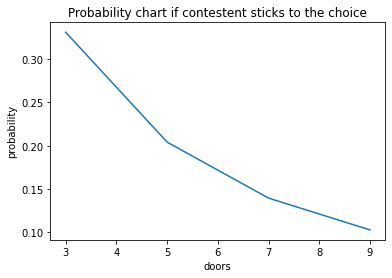

In [111]:
simulate_and_plot(10000, 0)

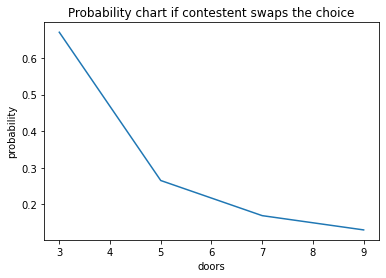

In [112]:
simulate_and_plot(10000, 1)